In [373]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [374]:
os.chdir('c:\\Users\\Utente\\Documents\\PPG-p2\\data')

In [375]:
os.getcwd()

'c:\\Users\\Utente\\Documents\\PPG-p2\\data'

In [376]:
df = pd.read_table('4-Riccardo.txt')

In [377]:
df = df.iloc[:,-3:]

In [378]:
df = df.rename(columns={'PPG_RED.' : 'Red', 'PPG_IR.': 'IR', 'PPG_GREEN.':'Green'})

In [379]:
df['tempo'] = df.index/200

In [380]:
df

,Red,IR,Green,tempo
0,16870,793,0,0.000
1,851,781,0,0.005
2,850,767,0,0.010
3,858,776,0,0.015
4,855,769,0,0.020
...,...,...,...,...
8941,51839,130109,0,44.705
8942,51735,129739,0,44.710
8943,51146,127968,0,44.715
8944,49982,124612,0,44.720


<AxesSubplot:xlabel='tempo'>

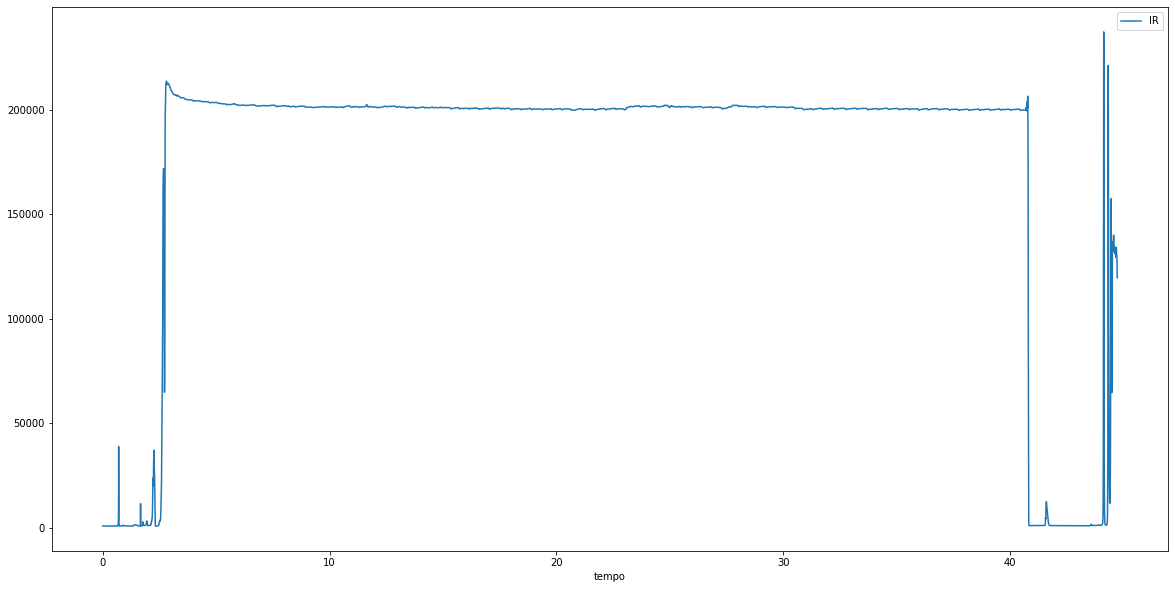

In [381]:
df.plot(x = 'tempo', y= 'IR', figsize=(20,10))

In [382]:
def taglio(df):
    print(len(df))
    for i in range(len(df)-1):
        
        if((df.at[i+1, 'tempo'] - df.at[i, 'tempo'])>0.1):
            print(df.at[i+1, 'tempo'], df.at[i, 'tempo'])
            df = df[0:i]
            break
    return df

In [383]:
df = taglio(df[df.IR> 190000].reset_index(drop=True).copy())

7613
44.125 40.79


In [384]:
df[df.IR> 190000].copy()

,Red,IR,Green,tempo
0,166752,195681,0,2.755
1,168646,198757,0,2.760
2,170224,202020,0,2.765
3,171565,205323,0,2.770
4,172446,207964,0,2.775
...,...,...,...,...
7602,162569,203087,0,40.765
7603,160295,201043,0,40.770
7604,164797,204213,0,40.775
7605,171573,206618,0,40.780


<AxesSubplot:xlabel='tempo'>

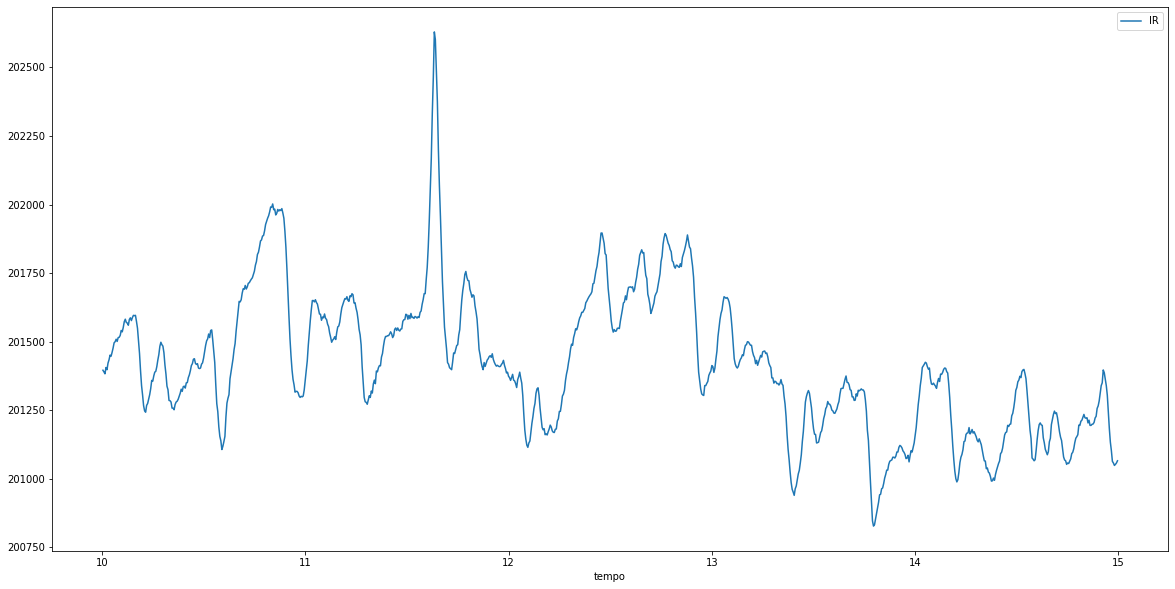

In [392]:
df[(df.tempo>10) & (df.tempo<15)].plot(x='tempo',y= 'IR', figsize=(20,10))

In [393]:
from scipy.signal import butter, filtfilt, find_peaks

In [394]:
def filtraggio(df, inizio, fine):
    b,a = butter(2,4,'lowpass',fs = 200)
    segnale_pulito = filtfilt(b,a, df[(df.tempo > inizio) & (df.tempo <fine)]['IR'])
    return segnale_pulito
    

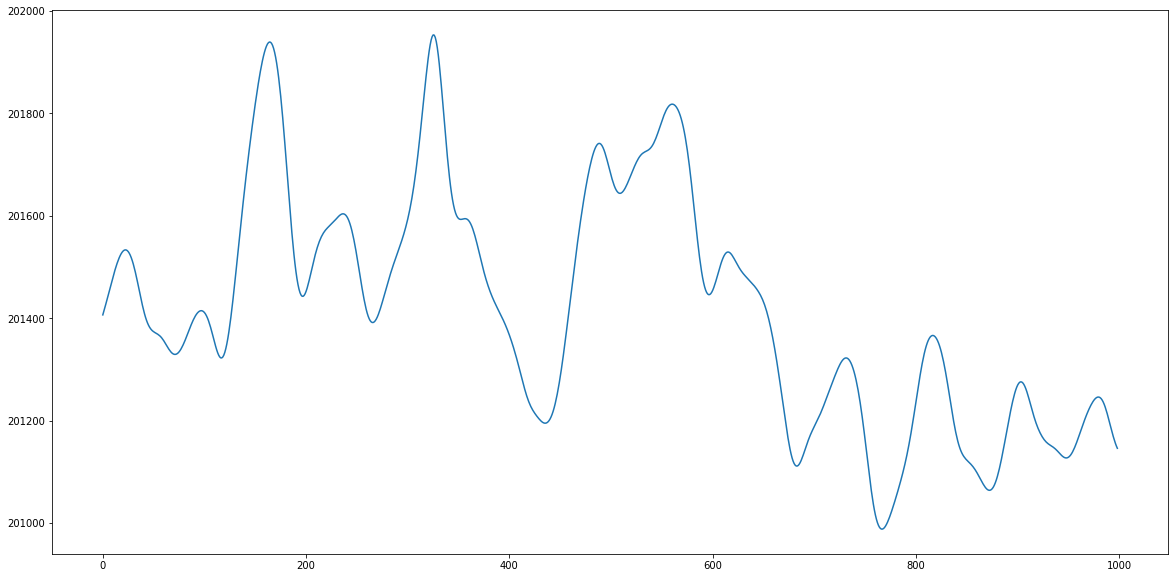

In [395]:
plt.figure(figsize=(20,10))
plt.plot(filtraggio(df, 10,15))

In [389]:
def graphpicchi(valori):
    
    picchi = filtraggio(valori)
    plt.figure(figsize=(20,10))
    
    plt.plot(np.arange(len(valori))*1/200, valori)
    plt.scatter([i/200 for i in picchi], [valori[i] for i in picchi], color = 'red')
    
    print(round(200/(picchi[1:len(picchi)]- picchi[0:len(picchi)-1]).mean()*60,2), 'bpm')

In [390]:
buffer = []

for jj in range(len(df)):
    buffer.append(df.at[jj, 'GyroX'])
    if(len(buffer) == 1000):
        #graphpicchi(buffer)
        buffer = []

KeyError: 'GyroX'